1. validation 적용
2. 구직 나잇대 18 ~ 정년 나잇대와 그 이외 나잇대로 나누어 분류
3. 최저임금 데이터 사용
4. 직업 코드, 지역을 대충 분류할 것
5. income의 분포를 볼 것
6. education 고졸까지 묶기

In [1]:
import pandas as pd
import numpy as np
K_income = pd.read_csv("Kor_income_training_data.csv")
# K_income = pd.read_csv("KITD_rmv.csv")
job_code = pd.read_csv("job_code_translated.csv")
K_income.head()

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.0
1,67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.0
2,38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.0
3,72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.0
4,21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.0


In [2]:
code = list(job_code['job_code'])

In [3]:
K_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78928 entries, 0 to 78927
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          78928 non-null  int64  
 1   id                  78928 non-null  int64  
 2   year                78928 non-null  int64  
 3   wave                78928 non-null  int64  
 4   region              78928 non-null  int64  
 5   family_member       78928 non-null  int64  
 6   gender              78928 non-null  int64  
 7   year_born           78928 non-null  int64  
 8   education_level     78928 non-null  int64  
 9   marriage            78928 non-null  int64  
 10  religion            78928 non-null  int64  
 11  occupation          78928 non-null  object 
 12  company_size        78928 non-null  object 
 13  reason_none_worker  78928 non-null  object 
 14  income              78928 non-null  float64
dtypes: float64(1), int64(11), object(3)
memory usage: 9.0

In [4]:
K_income['age'] = K_income['year'] - K_income['year_born']  #나이 변수 생성

#K_income['working'] = K_income['occupation'].apply(lambda x: 0 if x == ' ' else 1) # 직업 유무

K_income['gender'] -= 1; K_income['religion'] -= 1


K_income['occupation'].replace(' ',0,inplace = True)  # 공백인 데이터 0으로 변환
K_income['company_size'].replace(' ',0,inplace = True)
K_income['reason_none_worker'].replace(' ',0,inplace = True)

K_income['occupation'] = K_income['occupation'].apply(int)
K_income['company_size'] = K_income['company_size'].apply(int)
K_income['reason_none_worker'] = K_income['reason_none_worker'].apply(int)

# 이상치 제거
K_income = K_income.drop(K_income.company_size[K_income.company_size > 11].index) 
K_income = K_income.drop(K_income.reason_none_worker[K_income.reason_none_worker > 11].index) 
K_income = K_income.drop(K_income.income[K_income.income < 0].index)
K_income = K_income.drop(K_income.income[K_income.income > K_income.income.median() + K_income.income.std()*3].index)

In [5]:
elements = K_income[['age','wave','region','family_member','gender','education_level','marriage','occupation','company_size','reason_none_worker']]

income = K_income['income']

In [6]:
elements

,age,wave,region,family_member,gender,education_level,marriage,occupation,company_size,reason_none_worker
0,65,1,3,1,1,2,2,617,1,0
1,79,14,4,3,0,5,1,0,0,9
2,45,8,2,3,0,6,3,510,1,0
3,64,7,4,5,0,3,1,611,1,0
4,77,13,4,2,0,2,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...
78923,42,3,2,4,0,5,1,941,5,0
78924,34,2,2,4,0,5,1,512,2,0
78925,65,2,2,4,0,2,1,0,0,7
78926,82,14,7,1,1,3,2,0,0,10


In [7]:
elements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77927 entries, 0 to 78927
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 77927 non-null  int64
 1   wave                77927 non-null  int64
 2   region              77927 non-null  int64
 3   family_member       77927 non-null  int64
 4   gender              77927 non-null  int64
 5   education_level     77927 non-null  int64
 6   marriage            77927 non-null  int64
 7   occupation          77927 non-null  int64
 8   company_size        77927 non-null  int64
 9   reason_none_worker  77927 non-null  int64
dtypes: int64(10)
memory usage: 6.5 MB


In [8]:
# 명목 데이터 분류
for c in code:
    elements[f'code_{c}'] = elements['occupation'].apply(lambda x: 1 if x == c else 0) 
    
for s in range(1,12):
    elements[f'size_{s}'] = elements['company_size'].apply(lambda x: 1 if x == s else 0) 
    
#for w in range(2005,2019):
#    elements[f'wave_{w}'] = elements['wave'].apply(lambda x: 1 if x == w - 2004 else 0) 

elements['Seoul'] = elements['region'].apply(lambda x: 1 if x == 1 else 0)
elements['Kyeong-gi'] = elements['region'].apply(lambda x: 1 if x == 2 else 0)
elements['Kyoung-nam'] = elements['region'].apply(lambda x: 1 if x == 3 else 0)
elements['Kyoung-buk'] = elements['region'].apply(lambda x: 1 if x == 4 else 0)
elements['Chung-nam'] = elements['region'].apply(lambda x: 1 if x == 5 else 0)
elements['Gang-won & Chung-buk'] = elements['region'].apply(lambda x: 1 if x == 6 else 0)
elements['Jeolla & Jeju'] = elements['region'].apply(lambda x: 1 if x == 7 else 0)

elements['no_under7'] = elements['education_level'].apply(lambda x: 1 if x == 1 else 0)
elements['no_over7'] = elements['education_level'].apply(lambda x: 1 if x == 2 else 0)
elements['elementary'] = elements['education_level'].apply(lambda x: 1 if x == 3 else 0)
elements['middle school'] = elements['education_level'].apply(lambda x: 1 if x == 4 else 0)
elements['high school'] = elements['education_level'].apply(lambda x: 1 if x == 5 else 0)
elements['college'] = elements['education_level'].apply(lambda x: 1 if x == 6 else 0)
elements['university degree'] = elements['education_level'].apply(lambda x: 1 if x == 7 else 0)
elements['MA'] = elements['education_level'].apply(lambda x: 1 if x == 8 else 0)
elements['doctoral degree'] = elements['education_level'].apply(lambda x: 1 if x == 9 else 0)

elements['not applicable (under 18)'] = elements['marriage'].apply(lambda x: 1 if x == 1 else 0)
elements['married'] = elements['marriage'].apply(lambda x: 1 if x == 2 else 0)
elements['separated by death'] = elements['marriage'].apply(lambda x: 1 if x == 3 else 0)
elements['separated'] = elements['marriage'].apply(lambda x: 1 if x == 4 else 0)
elements['not married yet'] = elements['marriage'].apply(lambda x: 1 if x == 5 else 0)
elements['others'] = elements['marriage'].apply(lambda x: 1 if x == 6 else 0)



C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements[f'code_{c}'] = elements['occupation'].apply(lambda x: 1 if x == c else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  elements[f'code_{c}'] = elements['occupation'].apply(lambda x: 1 if x == c else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is us

C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  elements['not applicable (under 18)'] = elements['marriage'].apply(lambda x: 1 if x == 1 else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  elements['married'] = elements['marriage'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3311297905.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is

In [9]:
elements['no capable'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 1 else 0)
elements['in military service'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 2 else 0)
elements['studying in school'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 3 else 0)
elements['prepare for school'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 4 else 0)
elements['preprare to apply job'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 5 else 0)
elements['house worker'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 6 else 0)
elements['caring kids at home'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 7 else 0)
elements['nursing'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 8 else 0)
elements['giving-up economic activities'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 9 else 0)
elements['no intention to work'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 10 else 0)
elements['others_reason'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 11 else 0)

C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3461569341.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  elements['no capable'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 1 else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3461569341.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  elements['in military service'] = elements['reason_none_worker'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\uj200\AppData\Local\Temp/ipykernel_41300/3461569341.py:3: PerformanceWarning: DataFrame is highly fragme

In [10]:
elements.drop(['region', 'education_level','occupation','company_size','marriage','reason_none_worker'], axis =1, inplace = True)
#, 'wave'

In [11]:
elements

,age,wave,family_member,gender,code_111,code_112,code_120,code_131,code_132,code_133,...,in military service,studying in school,prepare for school,preprare to apply job,house worker,caring kids at home,nursing,giving-up economic activities,no intention to work,others_reason
0,65,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79,14,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,45,8,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,7,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,13,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,42,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78924,34,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78925,65,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
78926,82,14,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [13]:
x_train, x_test, y_train, y_test = train_test_split(elements, income, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(54548, 197) (23379, 197) (54548,) (23379,)


In [14]:
model = LinearRegression() 

model.fit(x_train, y_train) # 모델에 fitting

LinearRegression()

In [15]:
pred = model.predict(x_test)   # x_test로 예측한 income

In [16]:
print(round(model.score(x_train, y_train), 4) * 100)  # train data 평가
print(round(model.score(x_test, y_test), 4) * 100)  # test data 평가

61.29
61.07


In [17]:
rmse = math.sqrt(mean_squared_error(y_test, pred)) / len(y_test)

rmse

0.07370871632653711

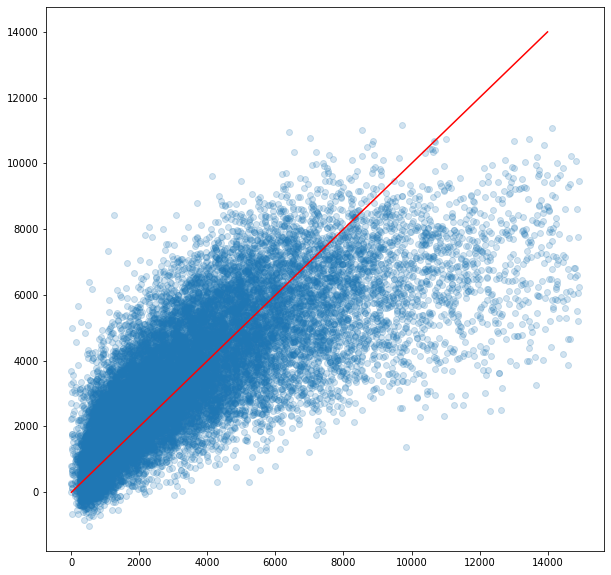

In [18]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, pred, alpha = 0.2)
plt.plot([0,14000], [0,14000], color = 'r')
plt.show()